In [1]:
import pickle
import pytorch_lightning as pl
import numpy as np
from torch.utils.data import DataLoader
from torch.utils.data.sampler import SubsetRandomSampler
import torch
from neuralpredictors.data.samplers import SubsetSequentialSampler
from typing import Optional
import pathlib
from torch.utils.data import Dataset
from torchvision import transforms
import matplotlib.pyplot as plt
import math
from experiments.utils import pickle_read
from skimage.transform import resize

def pickle_save(path, x):
    with open(path, "wb") as f:
        pickle.dump(x, f)


In [2]:
path_old = "/storage/brno2/home/mpicek/reCNN_visual_prosthesis/data/antolik"
path_new = "/storage/brno2/home/mpicek/reCNN_visual_prosthesis/data/antolik_reparametrized"

pos_ex_path = "/storage/brno2/home/mpicek/reCNN_visual_prosthesis/data/antolik_reparametrized/V1_Exc_L23/position.pickle"
pos_in_path = "/storage/brno2/home/mpicek/reCNN_visual_prosthesis/data/antolik_reparametrized/V1_Inh_L23/position.pickle"
pos_ex_path_err = "/storage/brno2/home/mpicek/reCNN_visual_prosthesis/data/antolik_reparametrized_error/V1_Exc_L23/position.pickle"
pos_in_path_err = "/storage/brno2/home/mpicek/reCNN_visual_prosthesis/data/antolik_reparametrized_error/V1_Inh_L23/position.pickle"
# ori_path = "/storage/budejovice1/home/mpicek/reCNN_visual_prosthesis/data/antolik/oris_new.pickle"

pos_old_path = "/storage/budejovice1/home/mpicek/reCNN_visual_prosthesis/data/antolik/position_dictionary.pickle"
ori_old_path = "/storage/budejovice1/home/mpicek/reCNN_visual_prosthesis/data/antolik/oris.pickle"


In [3]:
pos_ex = pickle_read(pos_ex_path)
pos_in = pickle_read(pos_in_path)
pos_ex_err = pickle_read(pos_ex_path_err)
pos_in_err = pickle_read(pos_in_path_err)
# ori = pickle_read(ori_path)
pos_old = pickle_read(pos_old_path)
old_ori = pickle_read(ori_old_path)

In [4]:
new_ex = np.zeros((2, 4000))
new_in = np.zeros((2, 1000))
new_ex[0,:] = pos_ex['x'].T
new_ex[1,:] = pos_ex['y'].T
new_in[0,:] = pos_in['x'].T
new_in[1,:] = pos_in['y'].T

print(new_ex.shape)

(2, 4000)


In [5]:
new_pos = {}
new_pos['V1_Exc_L2/3'] = new_ex
new_pos['V1_Inh_L2/3'] = new_in
pickle_save("/storage/budejovice1/home/mpicek/reCNN_visual_prosthesis/data/antolik/positions_reparametrized.pickle", new_pos)

In [63]:
pos_old['V1_Exc_L2/3'].shape

(3, 24000)

In [79]:
ori['V1_Exc_L2/3'] = list(ori['V1_Exc_L2/3'])
ori['V1_Inh_L2/3'] = list(ori['V1_Inh_L2/3'])
pickle_save("/storage/budejovice1/home/mpicek/reCNN_visual_prosthesis/data/antolik/oris_reparametrized.pickle", ori)

In [36]:
ori = pickle_read(ori_path)

In [37]:
ori.keys()


dict_keys(['V1_Inh_L2/3', 'V1_Exc_L2/3'])

In [25]:
out = np.concatenate([exc, inh])

In [44]:
exc.min()

0.0004692005529891574

In [11]:
stim_p = path_new + "/10trials/stimuli.pickle"
stim = pickle_read(stim_p)

In [12]:
ex_p = path_new + "/10trials/V1_Exc_L23/resp.pickle"
inh_p = path_new + "/10trials/V1_Inh_L23/resp.pickle"
ex = pickle_read(ex_p)
inh = pickle_read(inh_p)


In [19]:
ex.shape

(10, 500, 4000)

In [17]:
stim.shape

(500, 220, 220)

In [13]:
np.mean(np.std(ex[:,0,:]))

3.318381424042523

In [18]:
for i in range(10):
    # print(np.sum(np.abs(ex[0,0,:] - ex[i,0,:])))

0.0
1799339.8217468804
1287272.121212121
1455074.263322884
1582610.077456176
1324795.642135642
1309608.2709447418
1191727.2727272725
1287831.7290552584
2453206.883116883


In [21]:
np.sum(np.mean(ex[:,0,:] - ex[:,0,:]))

0.0

In [6]:
stim.shape

(500, 220, 220)

In [7]:
ex.shape

(10, 500, 4000)

In [9]:
ex.min()

0.0

In [20]:
inh.shape

(10, 500, 1000)

In [21]:
indices = [i for i in range(stim.shape[0] * 10)]

In [22]:
dic = {}

In [23]:
index = 0
for experiment in range(stim.shape[0]):
    for trial in range(10):
        dic[index] = {}
        index += 1

In [24]:
len(dic)


5000

In [25]:
index = 0
for experiment in range(stim.shape[0]):
    for trial in range(10):
        downsampled = resize(stim[experiment], (stim[experiment].shape[0] // 2, stim[experiment].shape[1] // 2), anti_aliasing=True)
        dic[index]["stimulus"] = downsampled
        dic[index]['V1_Exc_L2/3'] = ex[trial, experiment, :]
        dic[index]['V1_Inh_L2/3'] = inh[trial, experiment, :]
        index += 1

In [26]:
dic[0]["stimulus"].shape

(110, 110)

In [27]:
image = dic[0]["stimulus"]

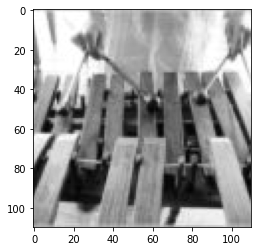

In [31]:
plt.imshow(dic[10]["stimulus"], cmap='gray')

In [32]:
new_10_trials_path = "/storage/brno2/home/mpicek/reCNN_visual_prosthesis/data/antolik_reparametrized/ten_trials.pickle"

In [33]:
pickle_save(new_10_trials_path, dic)

In [18]:
# old = pickle_read(path_old + "/ten_trials.pickle")

In [19]:
# indices = [list(old.keys())[i] for i in range(len(old))]

In [20]:
# np.sum(old[indices[10]]["stimulus"] - old[indices[19]]["stimulus"])

In [21]:
ex_pos_path = path_new + "/10trials/V1_Exc_L23/position.pickle"
inh_pos_path = path_new + "/10trials/V1_Inh_L23/position.pickle"
ex_pos = pickle_read(ex_pos_path)
inh_pos = pickle_read(inh_pos_path)

In [22]:
ex_pos_path2 = path_new + "/V1_Exc_L23/position.pickle"
inh_pos_path2 = path_new + "/V1_Inh_L23/position.pickle"
ex_pos2 = pickle_read(ex_pos_path)
inh_pos2 = pickle_read(inh_pos_path)

(4000,)

In [34]:
np.sum(np.abs(inh_pos['x'] - inh_pos2['x']))

0.0

: 